# **07.Autoencoder Code 실습**

[목적]
  - Deep Learning을 활용한 Dimensionality Reduction Code 실습
  - Autoencoder
  - Reveal Non-linear Structure
     - Text, Image 등 Data에 대해 시각화 하기 적합함
  - Class Label, Learning Algorithm이 아님
  
[Process]
  1. Define Data
  2. Modeling
  3. Plotting

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data

import warnings
warnings.filterwarnings("ignore")

from keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape

In [ ]:
# MNIST Data Loading
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
# Normalize pixel values to [0., 1.]
x_train = x_train / 255.
x_test = x_test / 255.

In [ ]:
x_train.shape

(60000, 28, 28)

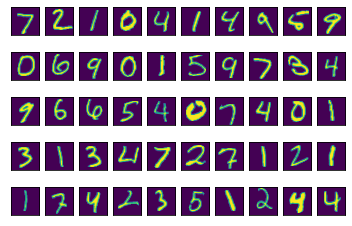

In [ ]:
# MNIST Visualization
def show_images(num_images):
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0,num_images):
            plt.subplot(int(num_images/10),10,digit_num+1) #create subplots
            mat_data = x_test[digit_num].reshape(28,28)  #reshape images
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images(50)

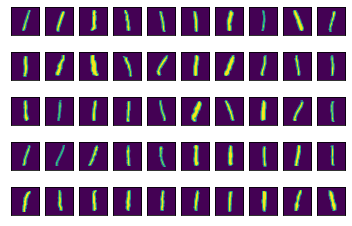

In [ ]:
# 특정 숫자 보여주기
def show_images_by_digit(digit_to_see):
    if digit_to_see in list(range(10)):
        indices = np.where(y_test == digit_to_see) # pull indices for num of interest
        for digit_num in range(0,50):
            plt.subplot(5,10, digit_num+1) #create subplots
            #reshape images
            mat_data = x_test[indices[0][digit_num]].reshape(28,28)
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images_by_digit(1)

[Autoencoder Dense Parameters]
  - Packge : https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
  - activation fuction : sigmoid가 기본이지만 Depth가 깊어질 수록 Gradient 문제가 발생하기 때문에 여러가지 function 들이 사용 됨
     - relu function
     - sigmoid function
     - softmax function
     - softplus function
     - softsign function
     - tanh function
     - selu function
     - elu function
     - exponential function
     - PReLU function
     - LeakyReLU function

In [ ]:
# This is the dimension of the latent space (encoding space)
latent_dim = 2

# Images are 28 by 28
img_shape = (x_train.shape[1], x_train.shape[2])

encoder = Sequential([
    Flatten(input_shape=img_shape),
    Dense(192, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(latent_dim, name='encoder_output')])

decoder = Sequential([
    Dense(64, activation='relu', input_shape=(latent_dim,)),
    Dense(128, activation='relu'),
    Dense(img_shape[0] * img_shape[1], activation='relu'),
    Reshape(img_shape)])

In [ ]:
# iteration(epoch)에 따른 latent 1, 2의 변화
class TestEncoder(tf.keras.callbacks.Callback):
    def __init__(self, x_test, y_test):
        super(TestEncoder, self).__init__()
        self.x_test = x_test
        self.y_test = y_test
        self.current_epoch = 0

    def on_epoch_begin(self, epoch, logs={}):
        self.current_epoch = self.current_epoch + 1
        encoder_model = Model(inputs=self.model.input,
                              outputs=self.model.get_layer('encoder_output').output)
        encoder_output = encoder_model(self.x_test)
        plt.subplot(10, 5, self.current_epoch)
        plt.title("epoch : {}".format(self.current_epoch))
        plt.scatter(encoder_output[:, 0],
                    encoder_output[:, 1], s=15, alpha=0.8,
                    cmap='Set1', c=self.y_test[0:self.y_test.shape[0]])
        plt.xlim(-9, 9)
        plt.ylim(-9, 9)
        plt.xlabel('Latent Dimension 1')
        plt.ylabel('Latent Dimension 2')

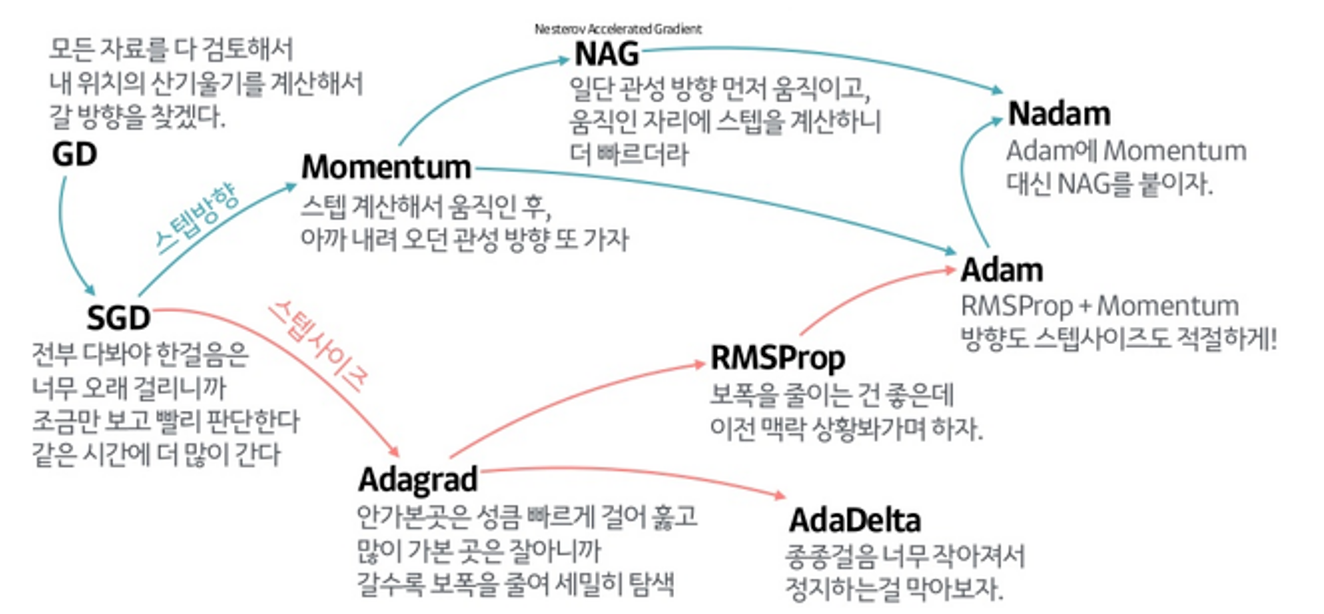

In [ ]:
# Model Set-up
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
plt.figure(figsize=(40,100))
model_history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=100, verbose=0,
                                callbacks=[TestEncoder(x_train[0:500], y_train[0:500])])

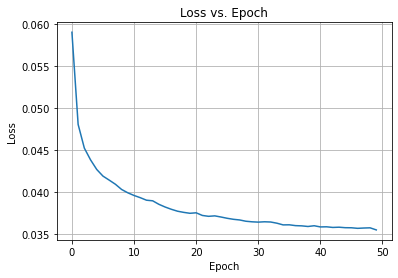

In [ ]:
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)